In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7', 'User8']
nbUsers = len(list_names)

addword = '10s'
maxTimeInterval = 4050

In [2]:
nbUsers

7

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
graspDuration = pd.DataFrame()
for user in range(0, int(nbUsers)):   
    graspD = pd.DataFrame()
    graspD = pd.read_csv('./Analysis/GraspDuration/'+ list_names[user]+ addword+ '.csv', sep = ";", decimal = '.')
    graspD['Config'] = graspD['Unnamed: 0']
    del graspD['Unnamed: 0']
    graspD['User'] = list_names[user]
    
    graspDuration = pd.concat([graspD, graspDuration], axis = 0, sort = True)

In [5]:
graspDuration['GraspDuration.6'].describe()#, graspDuration['GraspDuration.9'].describe(), graspDuration['GraspDuration.25'].describe(), graspDuration['GraspDuration.28'].describe()

count    718.000000
mean       3.044964
std        1.702013
min        1.006900
25%        1.962375
50%        2.595350
75%        3.507550
max       10.025691
Name: GraspDuration.6, dtype: float64

In [6]:
graspDuration.describe() # Look at config for graspduration over 3s

Config  GraspDuration.0  GraspDuration.1  GraspDuration.10  \
count  934.000000        57.000000        57.000000        192.000000   
mean    67.112420         5.233416         5.231259          4.350002   
std     38.966872         2.371562         2.367639          2.252935   
min      0.000000         1.755000         1.755000          1.269800   
25%     33.250000         3.358400         3.358400          2.595780   
50%     67.000000         5.138110         5.138110          3.713350   
75%    101.000000         6.533400         6.533400          5.547475   
max    134.000000        10.031230        10.031230         10.034800   

       GraspDuration.11  GraspDuration.12  GraspDuration.13  GraspDuration.14  \
count        442.000000        650.000000        177.000000        385.000000   
mean           3.196396          2.940402          4.040252          3.270993   
std            1.834212          1.787693          2.130335          1.877664   
min            1.004000          0.984900          1.194500          1.065800   
25%            2.008650          1.844900          2.419200          2.047900   
50%            2.625950          2.431590          3.322400          2.731100   
75%            3.676275          3.263750          5.324000          3.906400   
max           10.037500         10.036400         10.037500         10.037500   

       GraspDuration.15  GraspDuration.16  ...  GraspDuration.35  \
count        563.000000        169.000000  ...         61.000000   
mean           3.030036          4.026272  ...          4.597104   
std            1.803408          2.177462  ...          2.049210   
min            1.004000          1.269800  ...          1.939100   
25%            1.896950          2.418000  ...          3.195000   
50%            2.529950          3.264100  ...          3.969500   
75%            3.479800          5.289100  ...          5.450400   
max           10.016300         10.031000  ...         10.008090   

       GraspDuration.36  GraspDuration.37  GraspDuration.4  GraspDuration.5  \
count        115.000000        158.000000        94.000000       207.000000   
mean           3.790945          3.328120         4.931916         4.244165   
std            1.859715          1.779746         2.168902         2.167095   
min            1.532000          0.694000         1.842000         1.291400   
25%            2.397200          2.145425         3.251525         2.661550   
50%            3.425000          2.792000         4.553500         3.626900   
75%            4.595150          3.925500         5.954850         5.328135   
max           10.029410         10.015070        10.025870        10.030100   

       GraspDuration.6  GraspDuration.7  GraspDuration.8  GraspDuration.9  \
count       718.000000       248.000000       504.000000       762.000000   
mean          3.044964         4.280235         3.358391         2.754052   
std           1.702013         2.218501         1.946485         1.659262   
min           1.006900         1.291400         1.067500         0.938900   
25%           1.962375         2.601925         2.016375         1.798700   
50%           2.595350         3.686500         2.745350         2.313650   
75%           3.507550         5.470450         4.010625         3.060688   
max          10.025691        10.017500        10.025890        10.027470   

       MeanDuration  
count    934.000000  
mean       3.271988  
std        1.616720  
min        1.051650  
25%        2.181125  
50%        2.868000  
75%        3.918937  
max       10.019664  

[8 rows x 40 columns]

In [9]:
graspDuration['MeanDuration'].quantile(0.8)

4.201652051282036

In [7]:
over4s = (graspDuration['MeanDuration'] >= 4.0)
graspDuration[over4s]['MeanDuration'].describe()

count    220.000000
mean       5.526393
std        1.692673
min        4.002800
25%        4.361495
50%        4.836365
75%        5.986656
max       10.019664
Name: MeanDuration, dtype: float64

In [12]:
#graspDuration[over4s & (graspDuration['User'] == 'User8')]['Task']

In [13]:
finalData = pd.DataFrame()
for user in range(0, int(nbUsers)):   
    finalUser = pd.DataFrame()
    finalUser = pd.read_csv('./Analysis/ValidateMe/'+ list_names[user]+ addword+ '.csv', sep = ";", decimal = '.')
    del finalUser['Unnamed: 0']
    finalUser['User'] = list_names[user]
    
    finalData = pd.concat([finalUser, finalData], axis = 0, sort = True)

In [14]:
finalData.columns

Index(['ClosToFinal.0', 'ClosToFinal.1', 'ClosToFinal.10', 'ClosToFinal.11',
       'ClosToFinal.12', 'ClosToFinal.13', 'ClosToFinal.14', 'ClosToFinal.15',
       'ClosToFinal.16', 'ClosToFinal.17',
       ...
       'Speed.37', 'Speed.4', 'Speed.5', 'Speed.6', 'Speed.7', 'Speed.8',
       'Speed.9', 'Task', 'Time', 'User'],
      dtype='object', length=158)

In [15]:
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
scales = ['small', 'medium', 'large']

In [16]:
finalData[(finalData['Time'] == 500) & (finalData['Config'] == 3)]['PredToFinal.9'].dropna().describe()

count     6.000000
mean      5.765753
std       6.712662
min       0.000000
25%       2.250929
50%       3.645154
75%       6.049404
max      18.667204
Name: PredToFinal.9, dtype: float64

## Average all phalanges per Time interval (keep User discrimination)

In [17]:
meanHands = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, maxTimeInterval, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(0, 38):
            if('PredToFinal.'+str(phal) in finalData[condUser].columns):
                #if(np.isnan(finalData[condUser]['PredToFinal.'+str(phal)]) == False):
                if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1
                    
                if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanHands = pd.concat([meanHand, meanHands], axis = 0, sort = False)
        

In [18]:
meanHands.head()

Predictions  Positions   Closest       Speed   User  Time
0       0.899094   0.054456  0.899094  230.000731  User8     0
50      1.718629   2.586016  1.717310  116.787272  User8    50
100     3.544387   5.561428  3.543507  117.294047  User8   100
150     4.342050   6.902429  4.341391  104.537677  User8   150
200     5.935976   9.197652  5.930211   99.716815  User8   200

In [19]:
meanHands.to_csv('./Analysis/AllUsers-Summary/AllHands-'+ addword +'.csv', sep = ';')

## Right Hand

In [20]:
meanRHand = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, maxTimeInterval, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(0, 19):
            if('PredToFinal.'+str(phal) in finalData[condUser].columns):
                #if(np.isnan(finalData[condUser]['PredToFinal.'+str(phal)]) == False):
                if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1
                    
                if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanRHand = pd.concat([meanHand, meanRHand], axis = 0, sort = False)
        

In [21]:
meanRHand.head()

Predictions  Positions   Closest       Speed   User  Time
0       0.676654   0.063156  0.676654  218.240163  User8     0
50      1.346558   2.343577  1.344581  115.287730  User8    50
100     1.713946   3.632626  1.712628   92.938834  User8   100
150     2.308358   4.895440  2.307369   85.767122  User8   150
200     3.443170   6.721254  3.434485   86.028866  User8   200

In [22]:
meanRHand.to_csv('./Analysis/AllUsers-Summary/RightHand-'+ addword +'.csv', sep = ';')

## Right Thumb and Index

In [23]:
meanRTI = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    
    for time in range(0, maxTimeInterval, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(6, 10, 3):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1
                
            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanRTI = pd.concat([meanHand, meanRTI], axis = 0, sort = False)
        

In [24]:
meanRTI.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.493123   0.015533  0.493123  77.990417  User8     0
50      0.977141   1.851533  0.977141  63.286566  User8    50
100     1.423695   3.225666  1.423695  60.901976  User8   100
150     1.723350   4.288707  1.723350  60.427474  User8   150
200     2.279771   5.671248  2.279771  63.830515  User8   200

In [25]:
meanRTI.to_csv('./Analysis/AllUsers-Summary/RTI-'+ addword +'.csv', sep = ';')

## Right Thumb

In [26]:
meanT = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    
    for time in range(0, maxTimeInterval, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(6, 7):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1

            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanT = pd.concat([meanHand, meanT], axis = 0, sort = False)
       

In [27]:
meanT.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.520116   0.000000  0.520116        NaN  User8     0
50      0.952111   1.968951  0.952111  58.179570  User8    50
100     1.425085   3.283535  1.425085  59.021941  User8   100
150     1.661796   4.384435  1.661796  60.659666  User8   150
200     2.068691   5.760434  2.068691  65.382092  User8   200

In [28]:
meanT.to_csv('./Analysis/AllUsers-Summary/RT-'+ addword +'.csv', sep = ';')

## Right Index

In [29]:
meanI = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, maxTimeInterval, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(9, 10):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1
            
            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanI = pd.concat([meanHand, meanI], axis = 0, sort = False)

In [30]:
meanI.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.466129   0.031065  0.466129  77.990417  User8     0
50      1.002171   1.734115  1.002171  65.840064  User8    50
100     1.422305   3.167796  1.422305  62.155333  User8   100
150     1.784905   4.192978  1.784905  60.253331  User8   150
200     2.490851   5.582062  2.490851  62.589253  User8   200

In [31]:
meanI.to_csv('./Analysis/AllUsers-Summary/RI-'+ addword +'.csv', sep = ';')

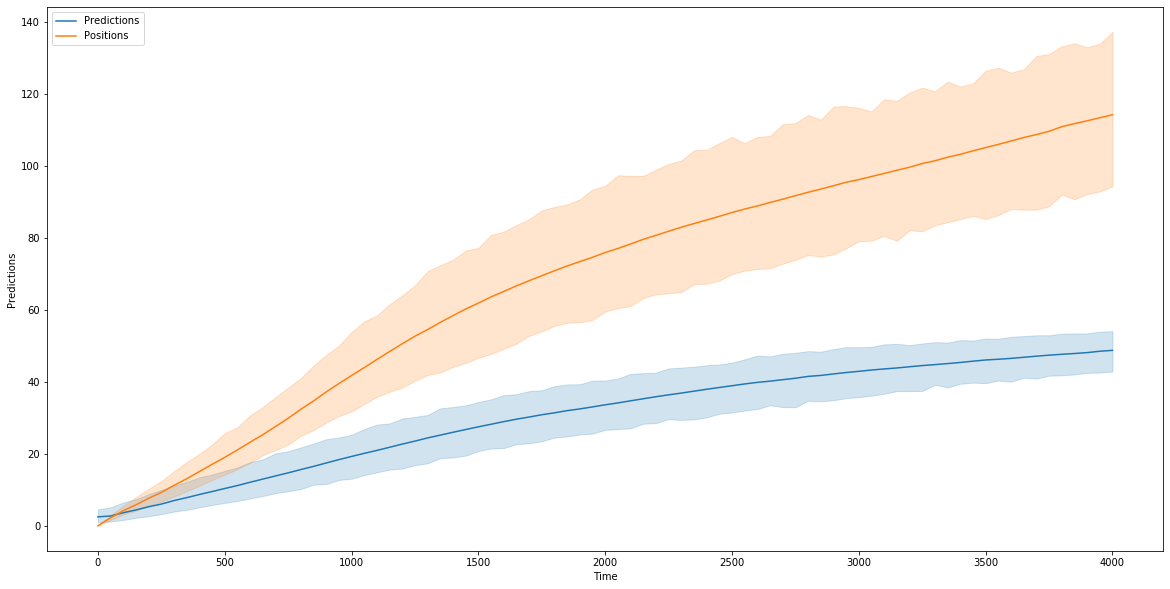

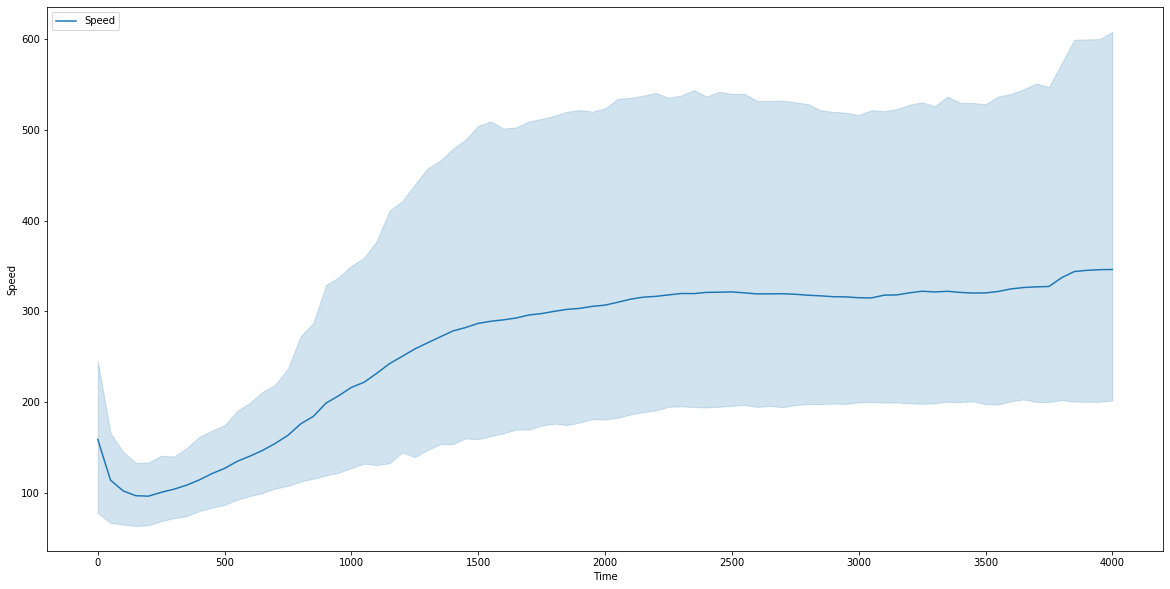

In [32]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRTI, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Positions', data = meanRTI, label = "Positions")
plt.legend(loc='upper left')
plt.savefig('./Analysis/Figs_CleanData/RTI-PosNPred.pdf')
#sns.lineplot(x = 'Time' , y = 'Closest', data = meanRTI, label = "Closest")

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed', data = meanRTI, label = "Speed")
plt.legend(loc='upper left')

plt.savefig('./Analysis/Figs_CleanData/RTI-Speed.pdf')

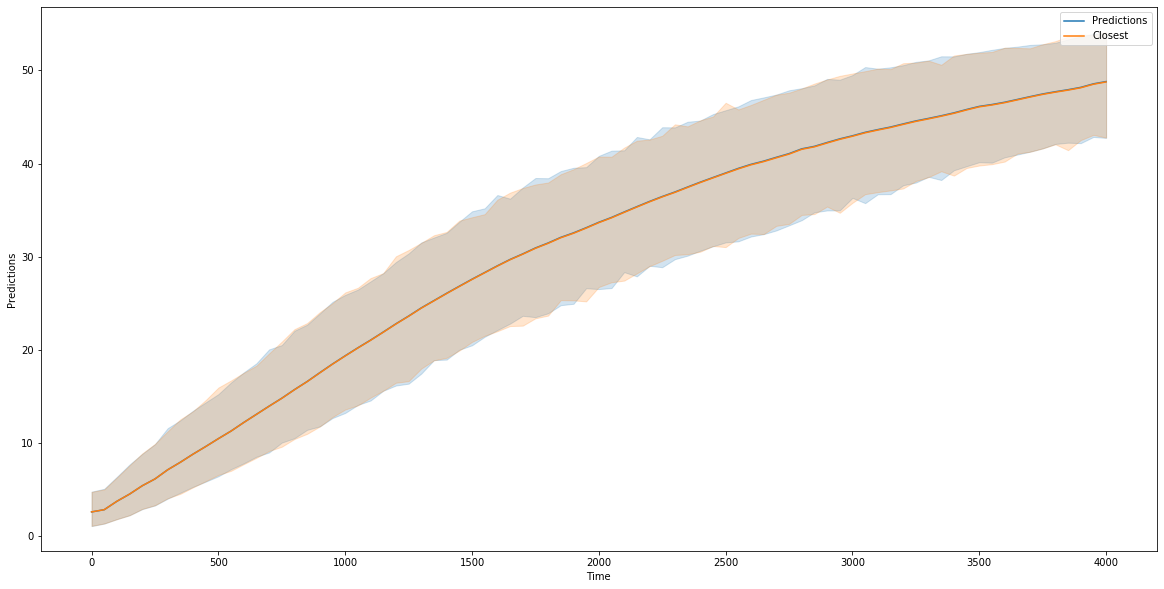

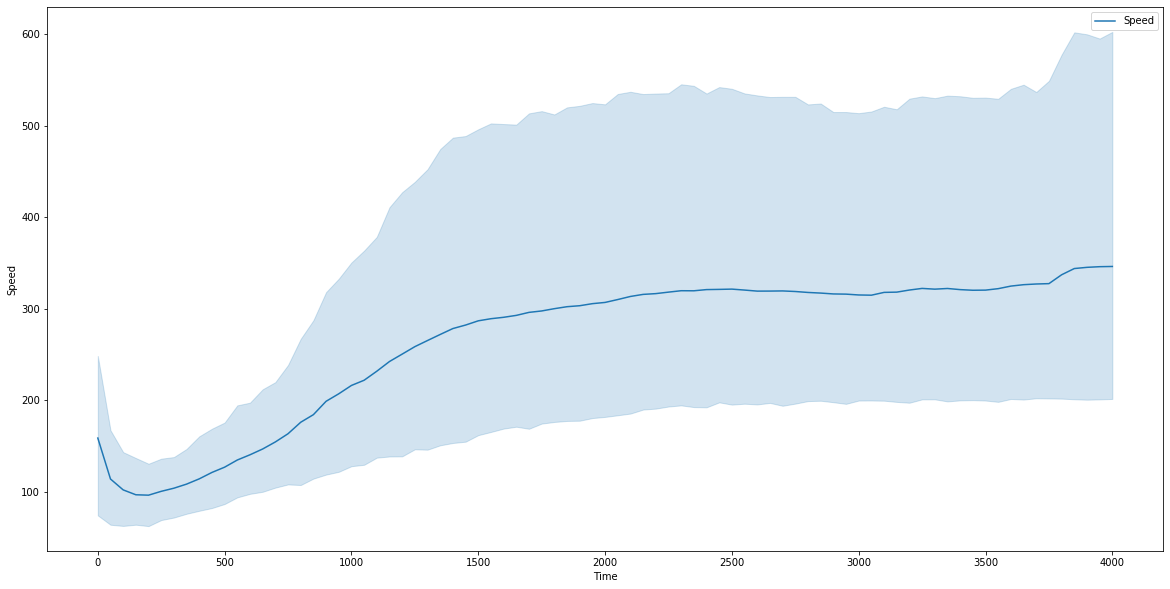

In [33]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRTI, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Closest', data = meanRTI, label = "Closest")

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed', data = meanRTI, label = "Speed")

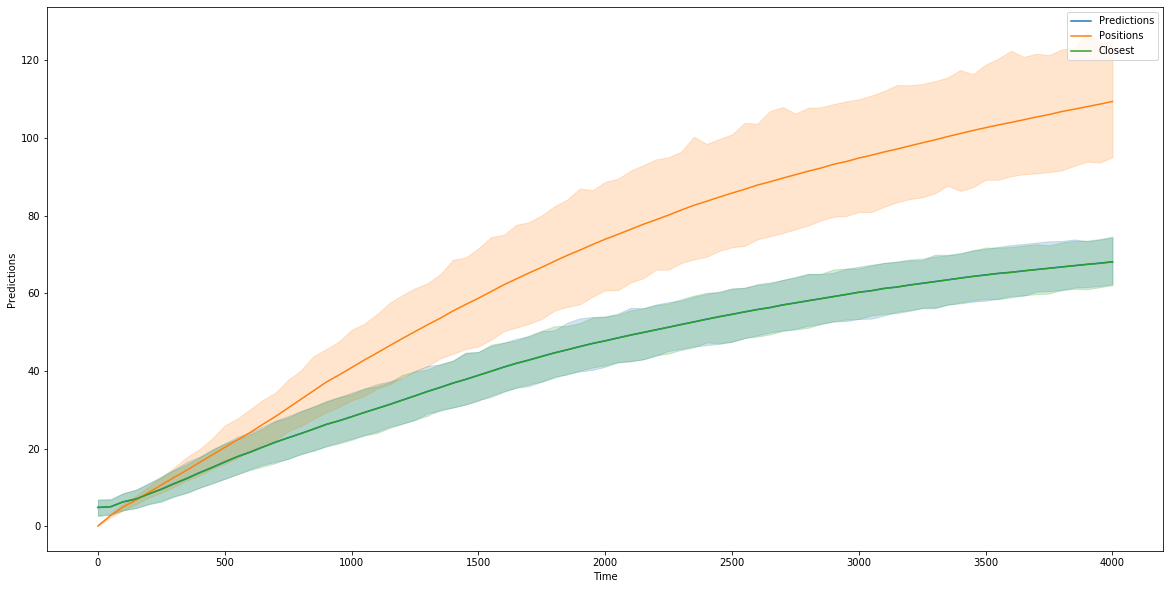

In [34]:
plt.figure(figsize = (20, 10))
#sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'User', data = meanRTI)
#sns.lineplot(x = 'Time' , y = 'Positions', hue = 'User', data = meanRTI)
#sns.lineplot(x = 'Time' , y = 'Closest', hue = 'User', data = meanRTI)

sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRHand, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Positions', data = meanRHand, label = "Positions")
sns.lineplot(x = 'Time' , y = 'Closest', data = meanRHand, label = "Closest")

In [35]:
# Per User, Whole hands // Right vs Left // Index + Thumb // Index // Thumb
# All users chart - Scale etc.
# Table with results / Clos/Pos/Pred/Speedb

## Conditions

### Scales

In [36]:
meanScale = pd.DataFrame()

for scale in range(0, len(scales)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, maxTimeInterval, 50):
            cond = (finalData['Scale'] == scales[scale]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(0, 38):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Scale'] = scales[scale]
        meanHand['Time'] = meanHand.index
        meanScale = pd.concat([meanHand, meanScale], axis = 0, sort = False)

In [37]:
meanScale.head()

Predictions  Positions   Closest      Speed   User  Scale  Time
0       0.938469   0.000000  0.938469        NaN  User8  large     0
50      1.049458   1.104559  1.049458  30.480300  User8  large    50
100     1.191544   1.671242  1.191544  32.637274  User8  large   100
150     1.406017   2.643214  1.406017  39.940476  User8  large   150
200     1.643054   3.507312  1.643054  41.105498  User8  large   200

In [38]:
meanScale.to_csv('./Analysis/AllUsers-Summary/Scales-'+ addword +'.csv', sep = ';')

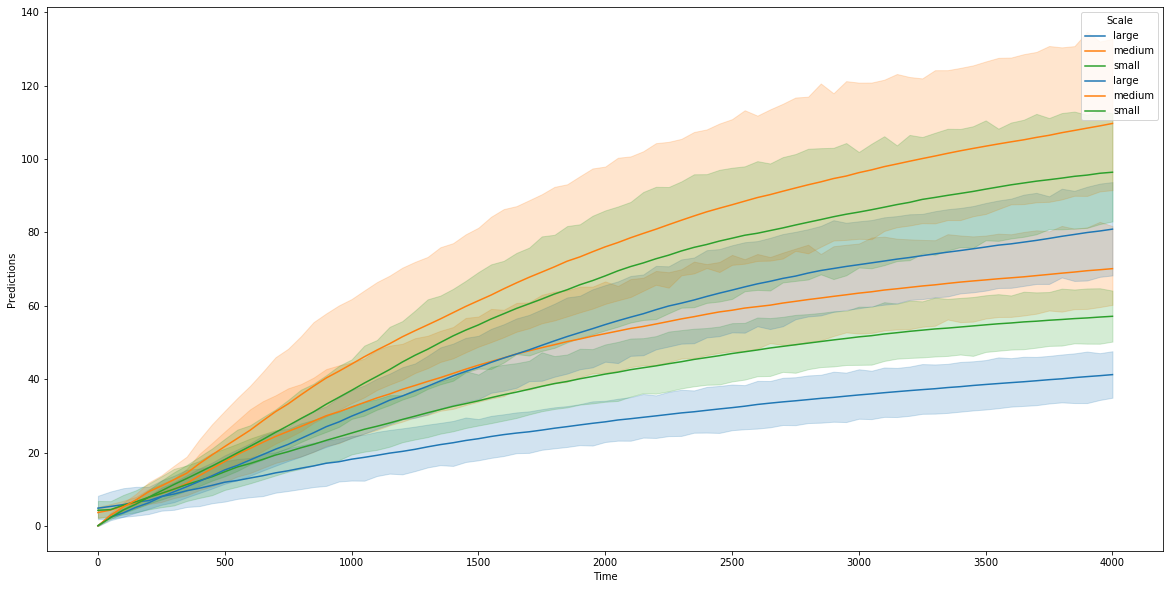

In [39]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Scale', data = meanScale)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Scale', data = meanScale)
#sns.lineplot(x = 'Time' , y = 'Closest', data = meanScale, label = "Closest")

In [40]:
meanScaleRTI = pd.DataFrame()

for scale in range(0, len(scales)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, maxTimeInterval, 50):
            cond = (finalData['Scale'] == scales[scale]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Scale'] = scales[scale]
        meanHand['Time'] = meanHand.index
        meanScaleRTI = pd.concat([meanHand, meanScaleRTI], axis = 0, sort = False)

In [41]:
meanScaleRTI.head()

Predictions  Positions   Closest      Speed   User  Scale  Time
0       0.461509   0.000000  0.461509        NaN  User8  large     0
50      0.875970   1.534631  0.875970  44.572816  User8  large    50
100     1.189799   2.735812  1.189799  49.006534  User8  large   100
150     1.370870   3.836211  1.370870  51.969681  User8  large   150
200     1.606586   5.086158  1.606586  53.674049  User8  large   200

In [42]:
meanScaleRTI.to_csv('./Analysis/AllUsers-Summary/Scales-RTI-'+ addword +'.csv', sep = ';')

In [43]:
meanScaleRTI['Speed_m_per_sec'] = meanScaleRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


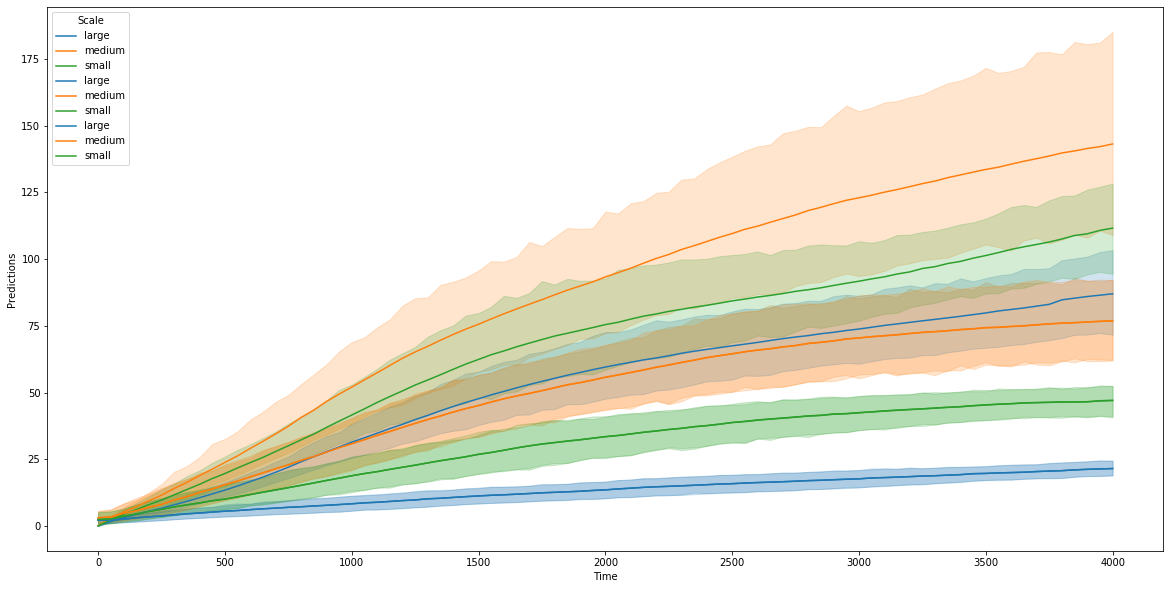

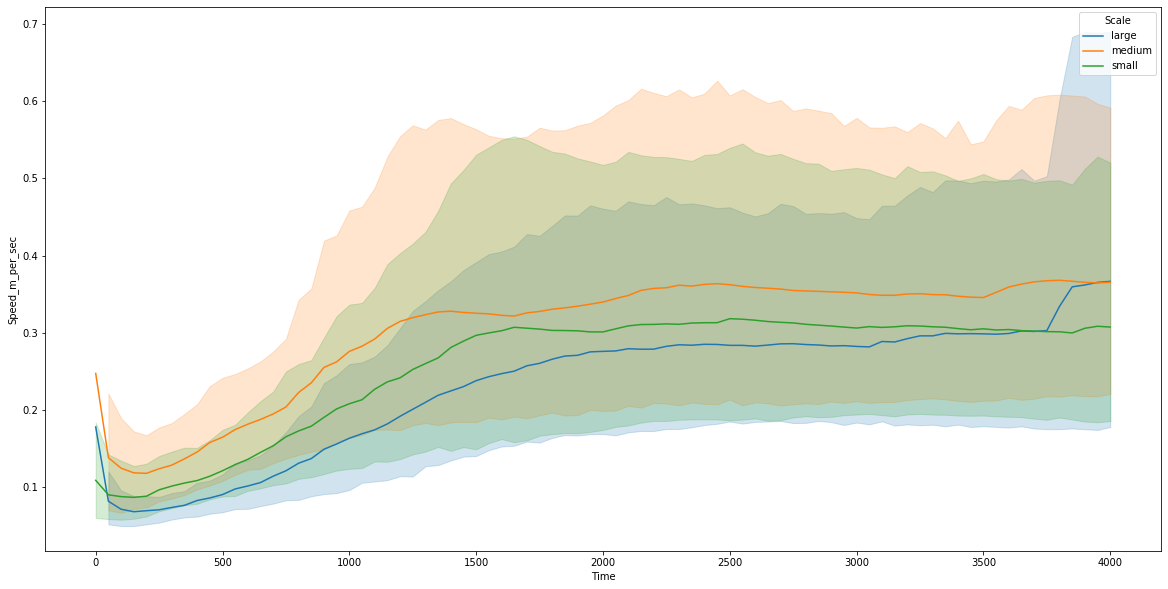

In [44]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Scale', data = meanScaleRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Scale', data = meanScaleRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Scale', data = meanScaleRTI)

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Scale', data = meanScaleRTI)

plt.savefig('./Analysis/Figs_CleanData/Sizes-Speed.pdf')

### Tasks

In [45]:
meanTaskRTI = pd.DataFrame()

for task in range(0, len(tasks)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, maxTimeInterval, 50):
            cond = (finalData['Task'] == tasks[task]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Time'] = meanHand.index

        meanHand['Task'] = tasks[task]
        meanTaskRTI = pd.concat([meanHand, meanTaskRTI], axis = 0, sort = False)

In [46]:
meanTaskRTI.tail()

Predictions   Positions    Closest       Speed   User  Time   Task
3800    32.144029  153.091820  31.904687  967.674621  User1  3800  Touch
3850    32.235580  153.630276  31.999306  957.150931  User1  3850  Touch
3900    32.523308  154.503162  32.290025  950.439296  User1  3900  Touch
3950    32.790191  155.158173  32.559824  943.768415  User1  3950  Touch
4000    33.058629  156.231715  32.831106  936.366548  User1  4000  Touch

In [47]:
meanTaskRTI.to_csv('./Analysis/AllUsers-Summary/Task-RTI-'+ addword +'.csv', sep = ';')

In [48]:
meanTaskRTI['Speed_m_per_sec'] = meanTaskRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


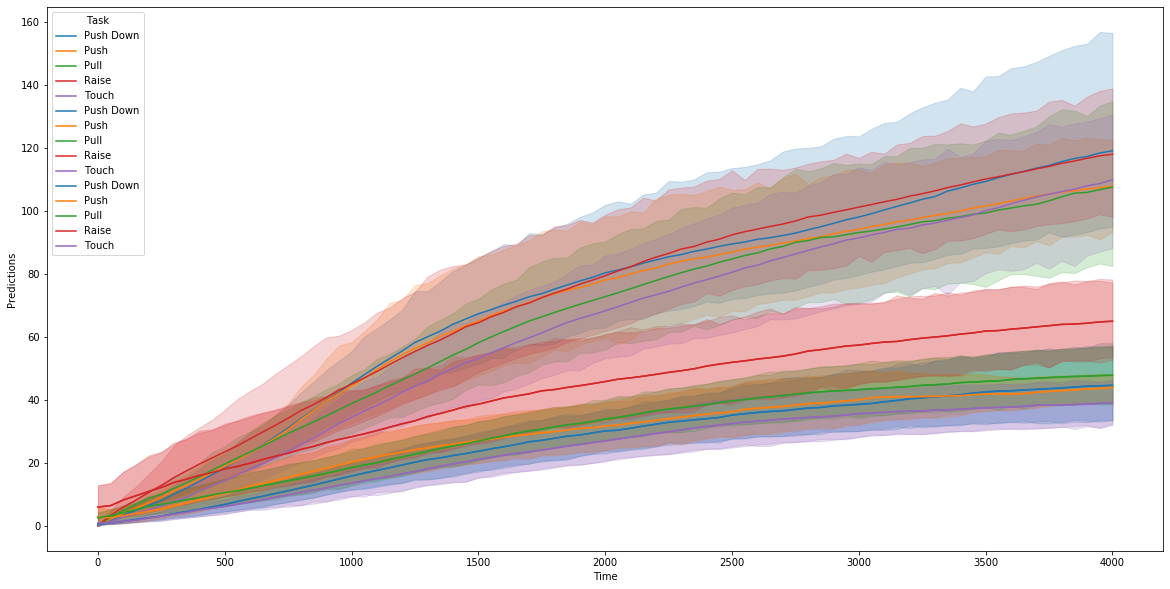

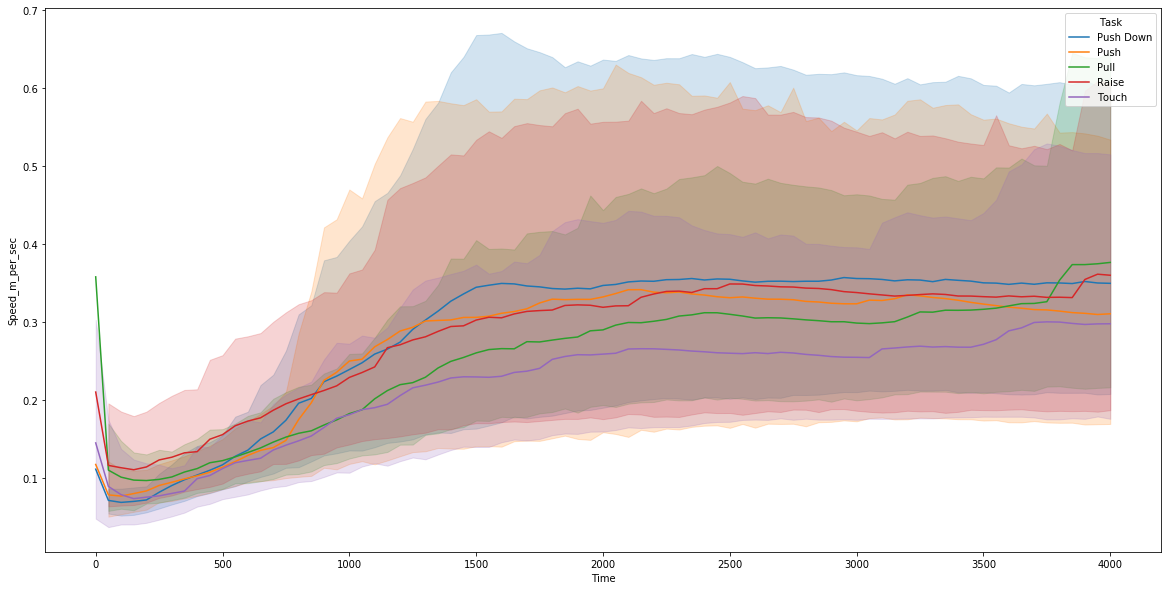

In [49]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Task', data = meanTaskRTI)

plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Task', data = meanTaskRTI)

### Objects

In [50]:
meanObjRTI = pd.DataFrame()

for obj in range(0, len(objects)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, maxTimeInterval, 50):
            cond = (finalData['Obj'] == objects[obj]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Time'] = meanHand.index

        meanHand['Obj'] = objects[obj]
        meanObjRTI = pd.concat([meanHand, meanObjRTI], axis = 0, sort = False)

In [51]:
meanObjRTI.tail()

Predictions   Positions    Closest        Speed   User  Time   Obj
3800    35.588277  143.330628  35.325812  1557.406040  User1  3800  obj0
3850    35.836354  144.202718  35.577254  1539.189444  User1  3850  obj0
3900    36.275257  145.493782  36.019436  1579.665437  User1  3900  obj0
3950    36.573088  146.417399  36.320465  1590.132153  User1  3950  obj0
4000    36.847402  147.256355  36.597898  1572.622648  User1  4000  obj0

In [52]:
meanObjRTI.to_csv('./Analysis/AllUsers-Summary/Obj-RTI-'+ addword +'.csv', sep = ';')

In [53]:
meanObjRTI['Speed_m_per_sec'] = meanObjRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


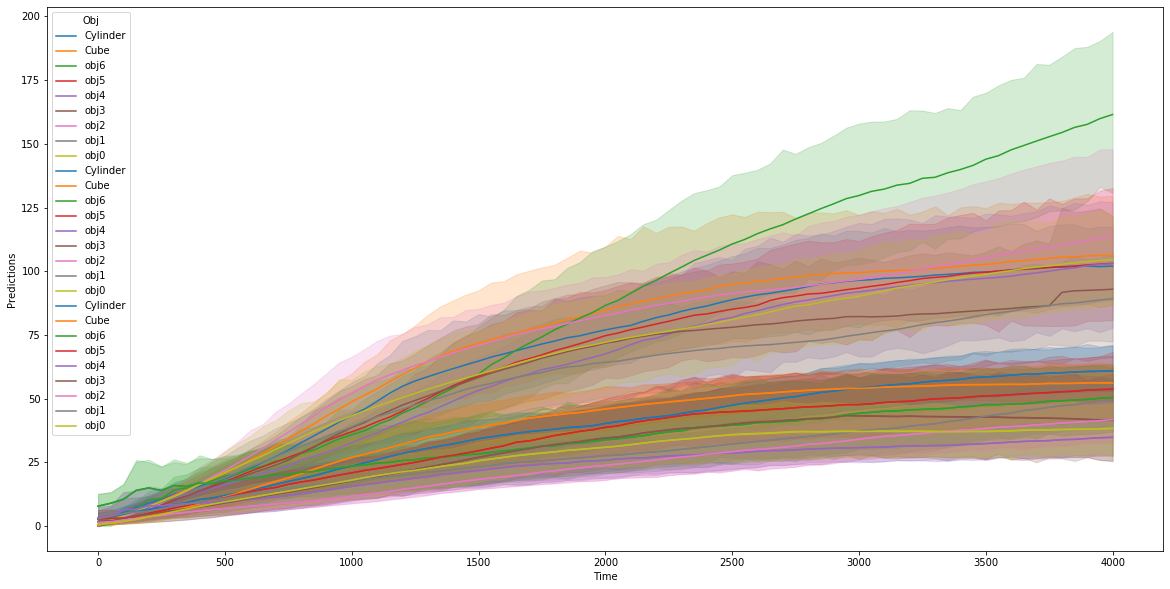

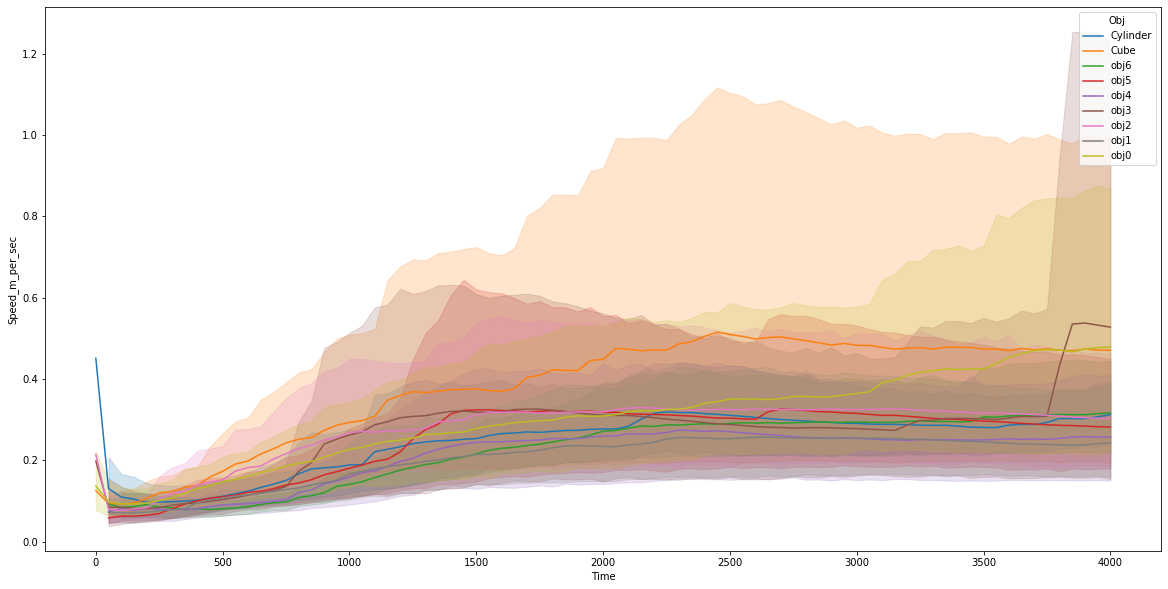

In [54]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Obj', data = meanObjRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Obj', data = meanObjRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Obj', data = meanObjRTI)

plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Obj', data = meanObjRTI)

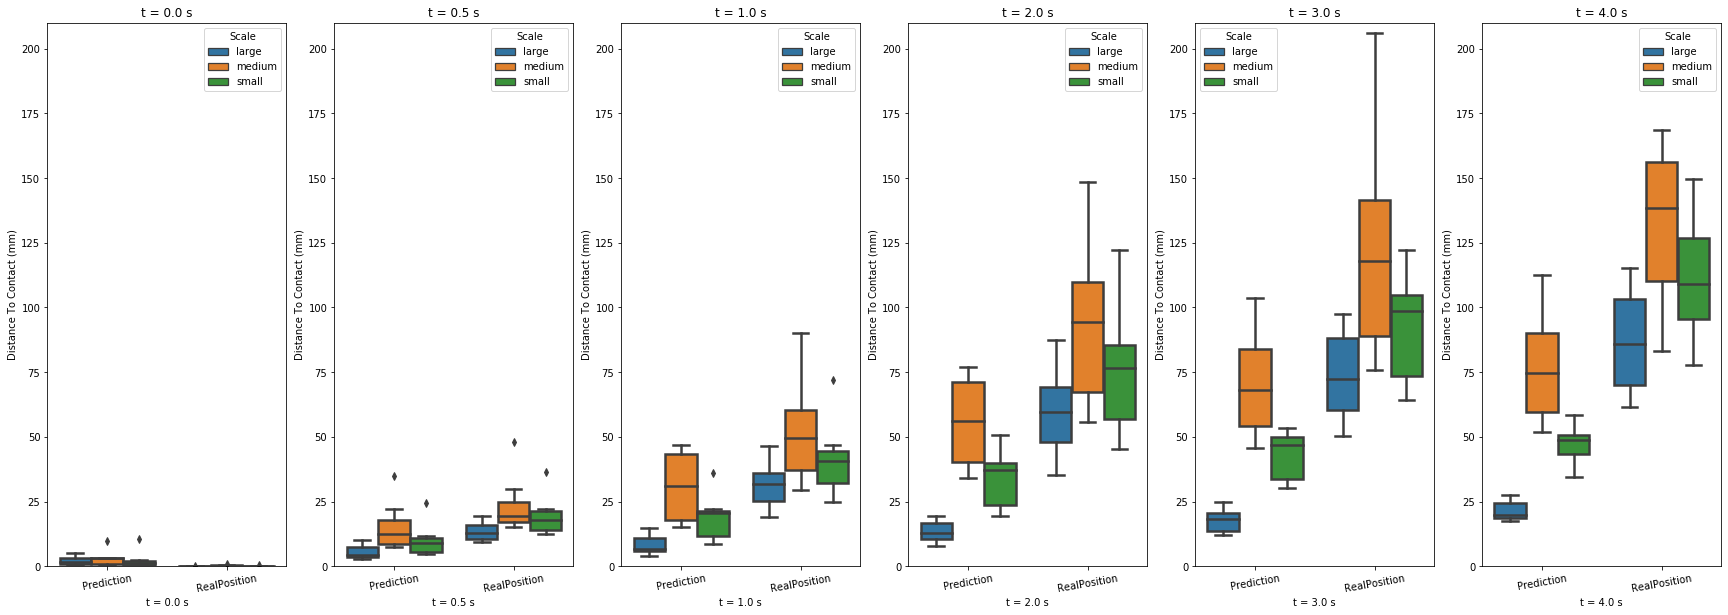

In [55]:
nameAx = []
nameFig = []
#tolTime = [0, 600, 1200, 1800, 2400, 3000]
tolTime = [0, 500, 1000, 2000, 3000, 4000]

lim = [50, 150, 300, 500, 600]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Predictions']).assign(Trial=1)
    #df1['DistInTolTime.'+str(tolTime[i])] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Predictions']
    df1['Scale'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Scale']
    df1['Time'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Time']
    df2 = pd.DataFrame(meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Positions']).assign(Trial=2)
    df2['Predictions'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Positions']
    df2['Scale'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Scale']
    df2['Time'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Time']

    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale','Time'],value_vars='Predictions', var_name = 'Predictions')

    nameFig[i] = sns.boxplot(x= "Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[i].set_ylabel('Distance To Contact (mm)')
    nameFig[i].set_xlabel('t = '+str(tolTime[i]/1000) + ' s')
    nameAx[i].title.set_text('t = '+str(tolTime[i]/1000) + ' s')      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 210)

##plt.savefig('./AllFingers-38-ScaleBoxplot-Predict-RealPos.pdf')
plt.savefig('./Analysis/Figs_CleanData/Size-Boxplot.pdf')

## Summary Table Predictions/Closest/Positions at t_0, t_25%, t_50%, t_75%

In [61]:
#tableTime = [0, 300, 600, 1200, 1800, 2400, 3000]
tableTime = [0, 250, 500, 1000, 2000, 3000, 4000]

summaryTable = pd.DataFrame()
for time in range(0, len(tableTime)):
    summaryTable.loc[tableTime[time], 'Predictions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Predictions'].mean()

    summaryTable.loc[tableTime[time], 'Positions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Positions'].mean()

    summaryTable.loc[tableTime[time], 'Closest_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_Index'] = meanI[meanI['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Closest'].mean()
    
stdTable = pd.DataFrame()
for time in range(0, len(tableTime)):
    stdTable.loc[tableTime[time], 'Predictions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Predictions'].std()

    stdTable.loc[tableTime[time], 'Positions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Positions'].std()

    stdTable.loc[tableTime[time], 'Closest_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_Index'] = meanI[meanI['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Closest'].std()
    

In [62]:
summaryTable

Predictions_Hands  Predictions_R-Hand  Predictions_Index  \
0              3.757062            4.859255           2.592752   
250            8.650820            9.570464           6.357324   
500           17.000016           16.584576          11.186273   
1000          30.195504           28.229777          21.025102   
2000          47.632134           47.771128          35.612375   
3000          57.744746           60.272423          44.259774   
4000          64.347279           68.109048          49.842641   

      Predictions_Thumb  Predictions_RTI  Positions_Hands  Positions_R-Hand  \
0              2.606081         2.599417         0.076988          0.105227   
250            5.919176         6.138250        10.512878         10.645444   
500            9.746371        10.466322        20.758843         20.307086   
1000          17.695899        19.360501        41.567423         40.862870   
2000          31.775501        33.693938        71.174712         73.906490   
3000          41.696066        42.977920        89.441437         94.798500   
4000          47.760362        48.801502       101.202215        109.368232   

      Positions_Index  Positions_Thumb  Positions_RTI  Closest_Hands  \
0            0.158604         0.093399       0.126001       3.756408   
250         10.141088         8.611506       9.376297       8.620714   
500         20.583200        17.657708      19.120454      16.950207   
1000        44.730107        38.929484      41.829796      30.145289   
2000        81.326539        70.574642      75.950590      47.589674   
3000       102.370114        90.007340      96.188727      57.701588   
4000       121.751968       106.593599     114.172783      64.305846   

      Closest_R-Hand  Closest_Index  Closest_Thumb  Closest_RTI  
0           4.857957       2.592752       2.606081     2.599417  
250         9.515585       6.354506       5.918668     6.136587  
500        16.530182      11.173614       9.745931    10.459773  
1000       28.173286      21.000411      17.681539    19.340975  
2000       47.721761      35.564154      31.747800    33.655977  
3000       60.217176      44.192732      41.663917    42.928324  
4000       68.054554      49.785187      47.735593    48.760390

In [63]:
stdTable

Predictions_Hands  Predictions_R-Hand  Predictions_Index  \
0              1.963642            2.953575           3.179993   
250            3.814511            4.648120           5.308481   
500           10.335825            6.638344           7.368565   
1000          15.855546            8.586130           9.384283   
2000          18.204521            9.562100          10.503877   
3000          17.846720            9.777056          11.572202   
4000          15.924915            9.086488          10.847204   

      Predictions_Thumb  Predictions_RTI  Positions_Hands  Positions_R-Hand  \
0              2.629480         2.807093         0.049331          0.094395   
250            5.101738         5.115633         3.780771          2.898228   
500            6.456255         6.817034        12.025545          6.714670   
1000           9.055033         9.098327        21.342459         12.897691   
2000          10.877940        10.502885        27.544346         21.081012   
3000          10.369814        10.189598        28.608111         22.411735   
4000           7.818352         8.235258        25.922456         22.249529   

      Positions_Index  Positions_Thumb  Positions_RTI  Closest_Hands  \
0            0.182689         0.133795       0.150361       1.963109   
250          4.923488         3.816757       4.320890       3.802388   
500          8.844157         7.780980       8.171869      10.283183   
1000        17.599183        14.895105      15.792739      15.817422   
2000        28.066516        24.517301      25.741041      18.172048   
3000        31.721394        25.856922      28.312157      17.812882   
4000        36.814687        26.996883      31.286636      15.885001   

      Closest_R-Hand  Closest_Index  Closest_Thumb  Closest_RTI  
0           2.951544       3.179993       2.629480     2.807093  
250         4.631784       5.309872       5.101702     5.116564  
500         6.598178       7.362838       6.455907     6.814002  
1000        8.537976       9.385775       9.037726     9.090824  
2000        9.524630      10.483902      10.868137    10.487226  
3000        9.739311      11.582858      10.361485    10.187591  
4000        9.059891      10.876633       7.819296     8.244826

In [64]:
summaryTable.to_csv('./Analysis/Figs_CleanData/SummaryTable.csv', sep = ';')
stdTable.to_csv('./Analysis/Figs_CleanData/SummaryStdTable.csv', sep = ';')


In [56]:
meanScaleRTI.columns, meanTaskRTI.columns

(Index(['Predictions', 'Positions', 'Closest', 'Speed', 'User', 'Scale', 'Time',
        'Speed_m_per_sec'],
       dtype='object'),
 Index(['Predictions', 'Positions', 'Closest', 'Speed', 'User', 'Time', 'Task',
        'Speed_m_per_sec'],
       dtype='object'))

## RTI Heatmap Task/Scale

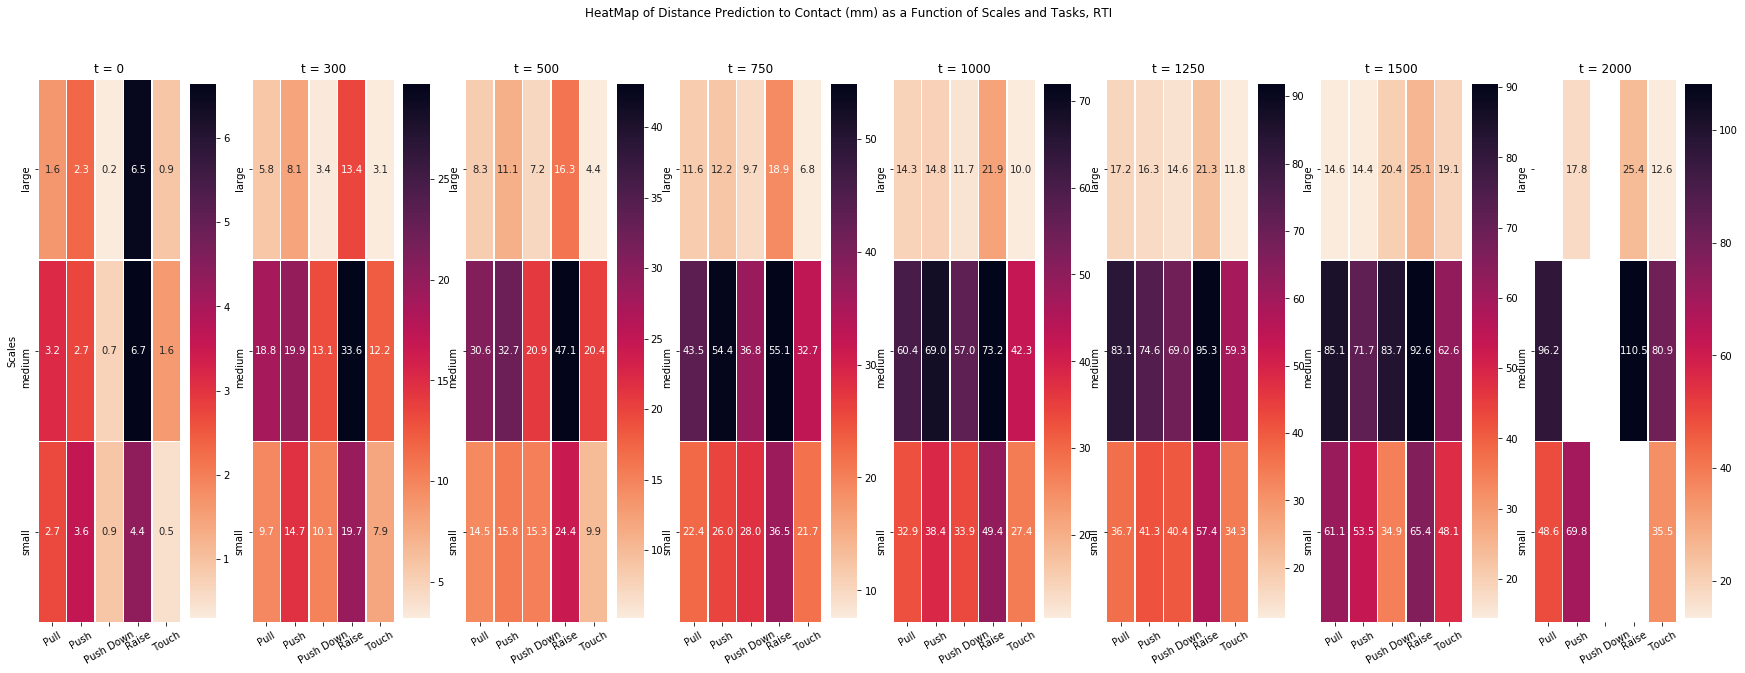

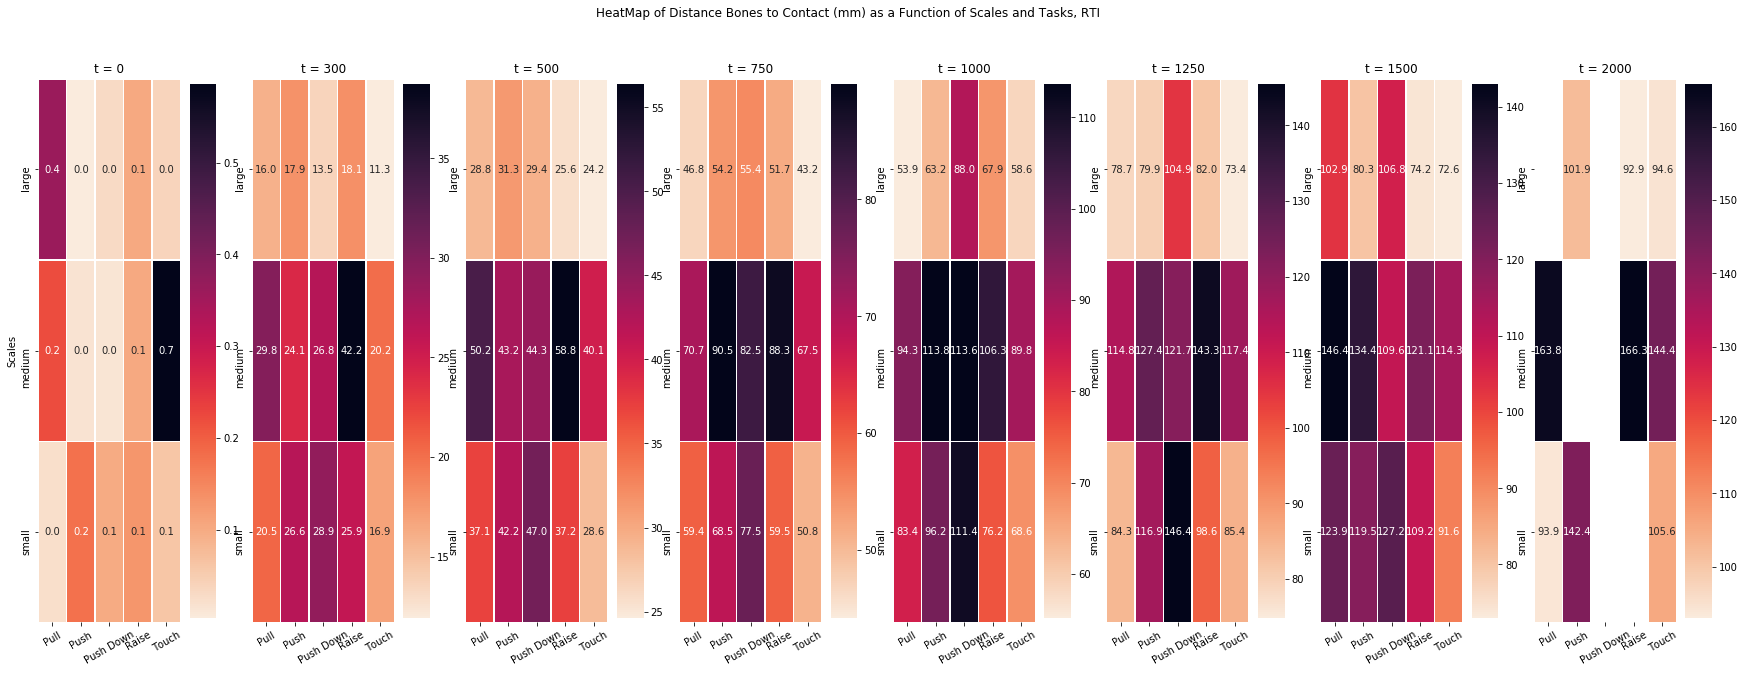

In [57]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Scale'] == scales[size]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Scale'] == scales[size]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PosToFinal.9'].mean() + finalData[cond]['PosToFinal.6'].mean())/2

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, RTI')

plt.show()

## RTI Heatmap Task/Object

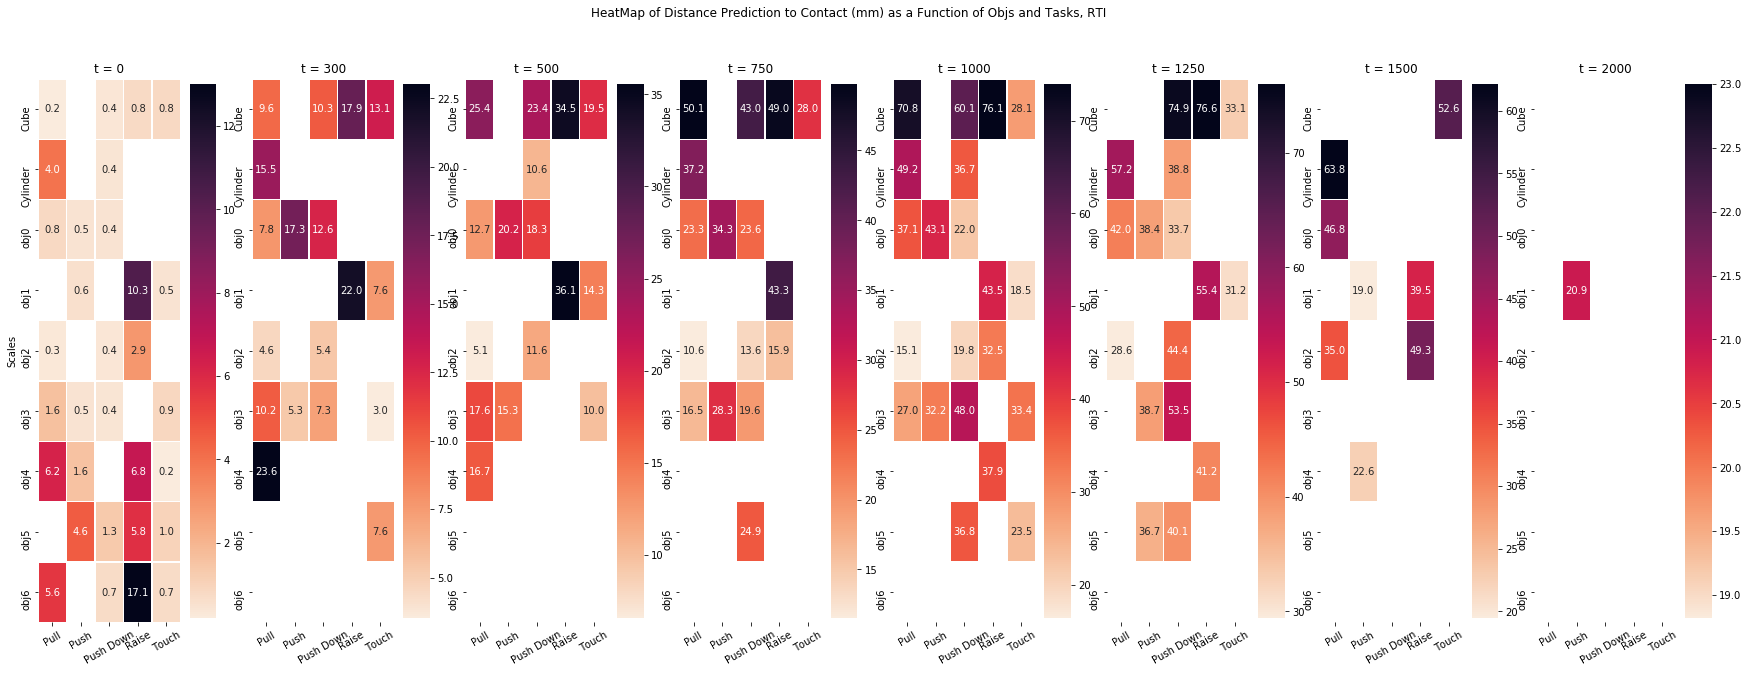

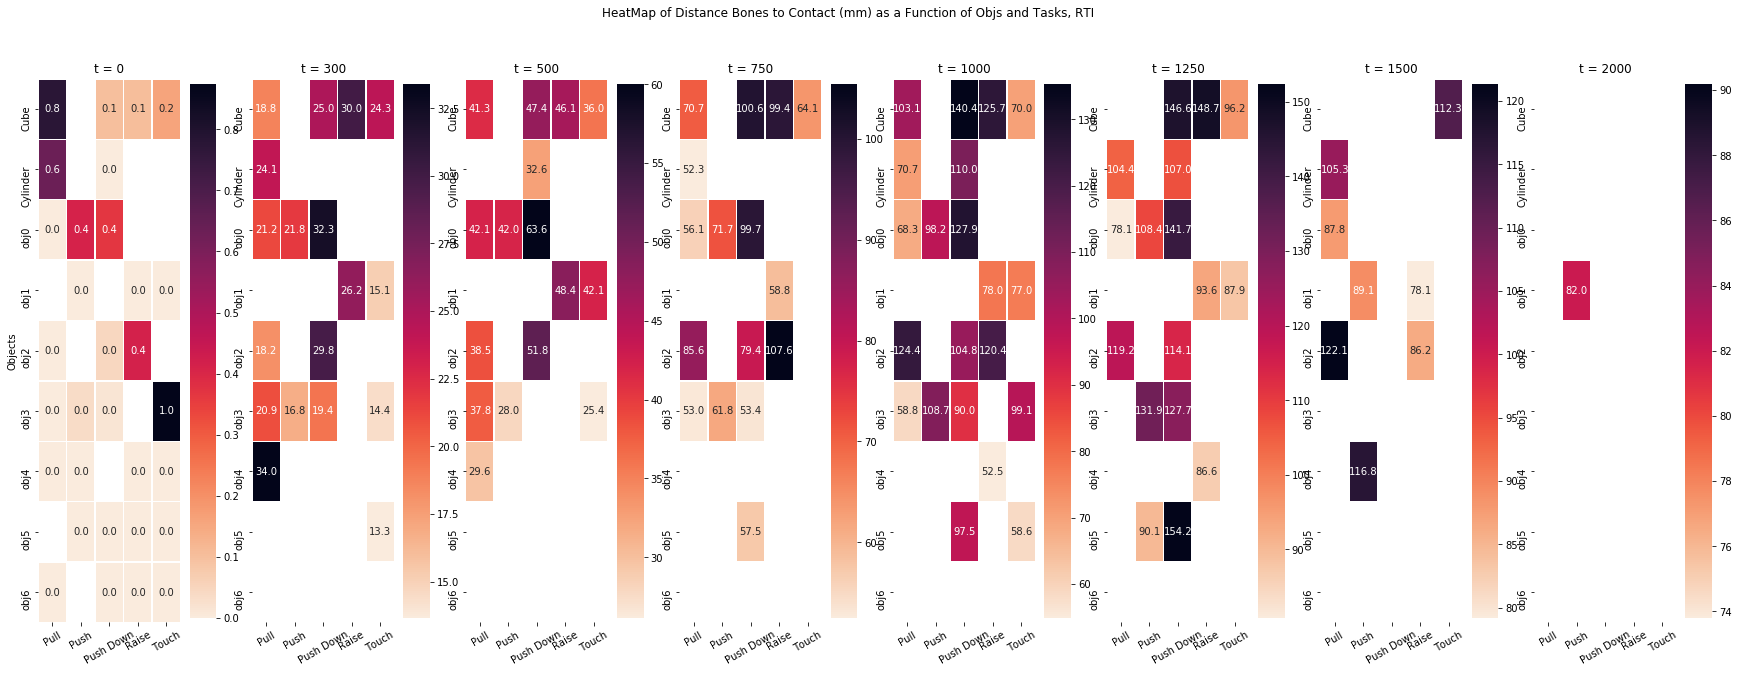

In [58]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskObj = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Objs and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskObj = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PosToFinal.9'].mean() + finalData[cond]['PosToFinal.6'].mean())/2

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
      
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Objs and Tasks, RTI')

plt.show()

## RTI Heatmap Scale/Object

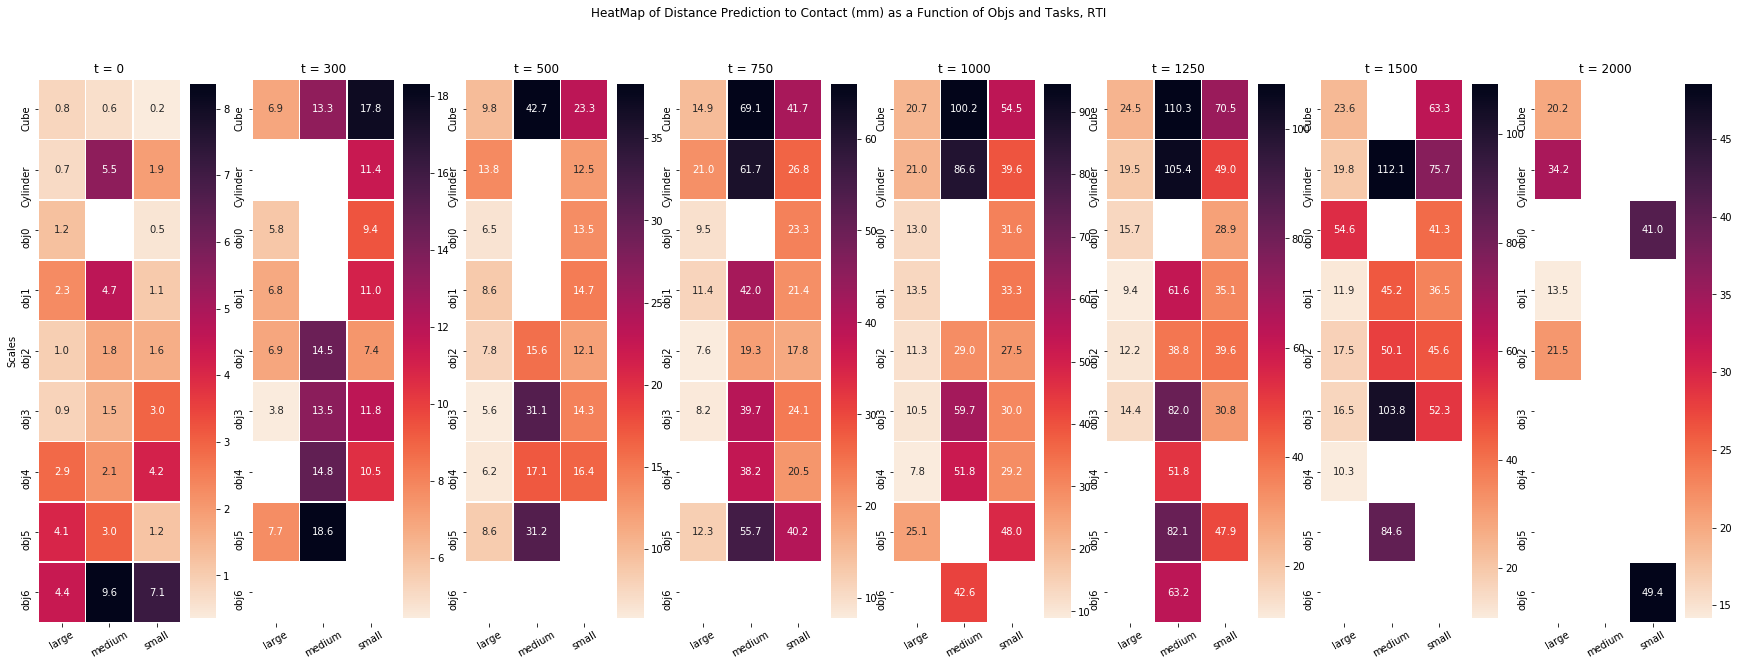

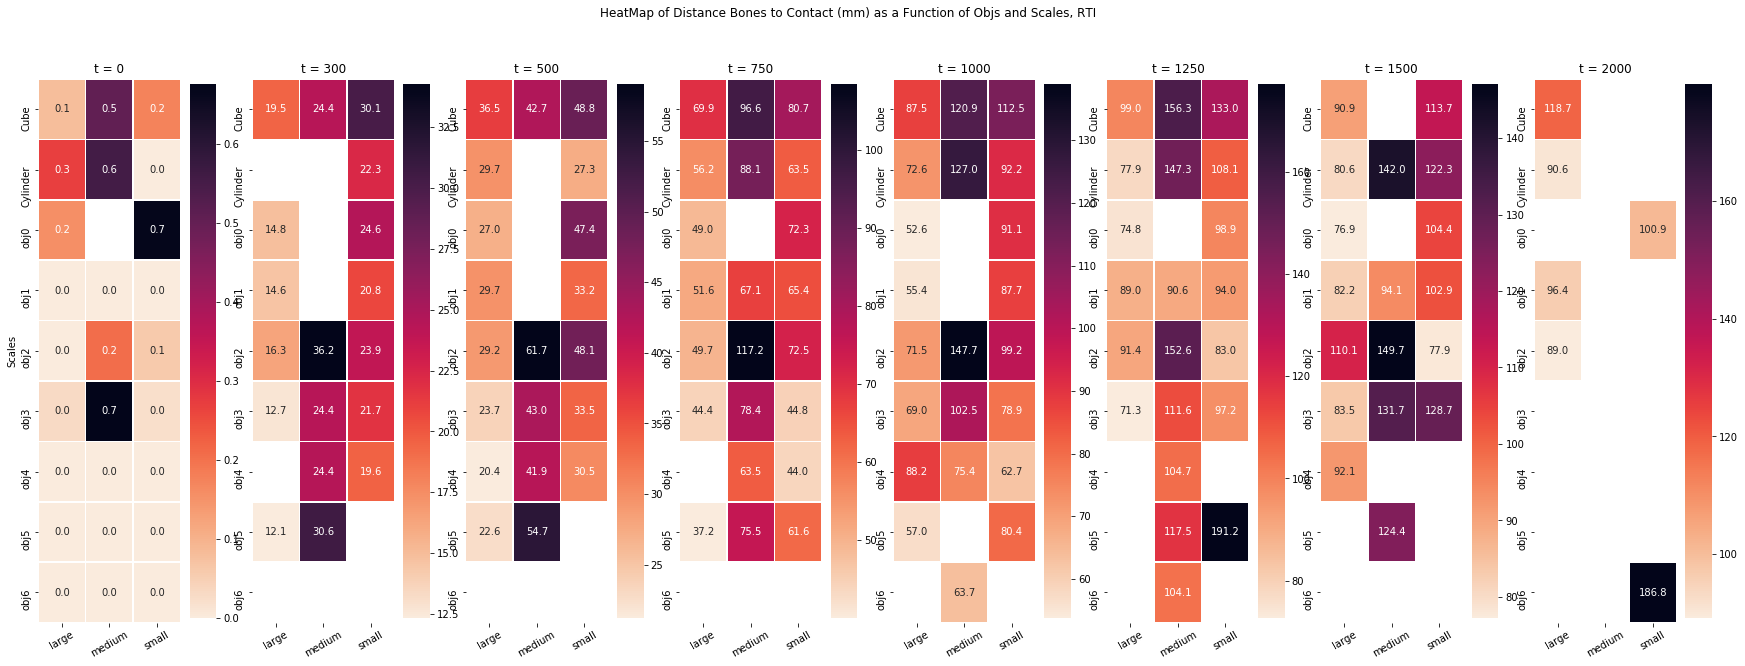

In [59]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    objScale = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Scale'] == scales[size]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            objScale.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(objScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Objs and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    objScale = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Scale'] == scales[size]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PosToFinal.9'].dropna().mean() + finalData[cond]['PosToFinal.6'].dropna().mean())/2

            objScale.loc[objects[obj], scales[size]] = mean/nbUsers
      
    nameFig[i] = sns.heatmap(objScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Objs and Scales, RTI')

plt.show()

In [60]:
meanTaskRTI['Time_s'] = meanTaskRTI['Time']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


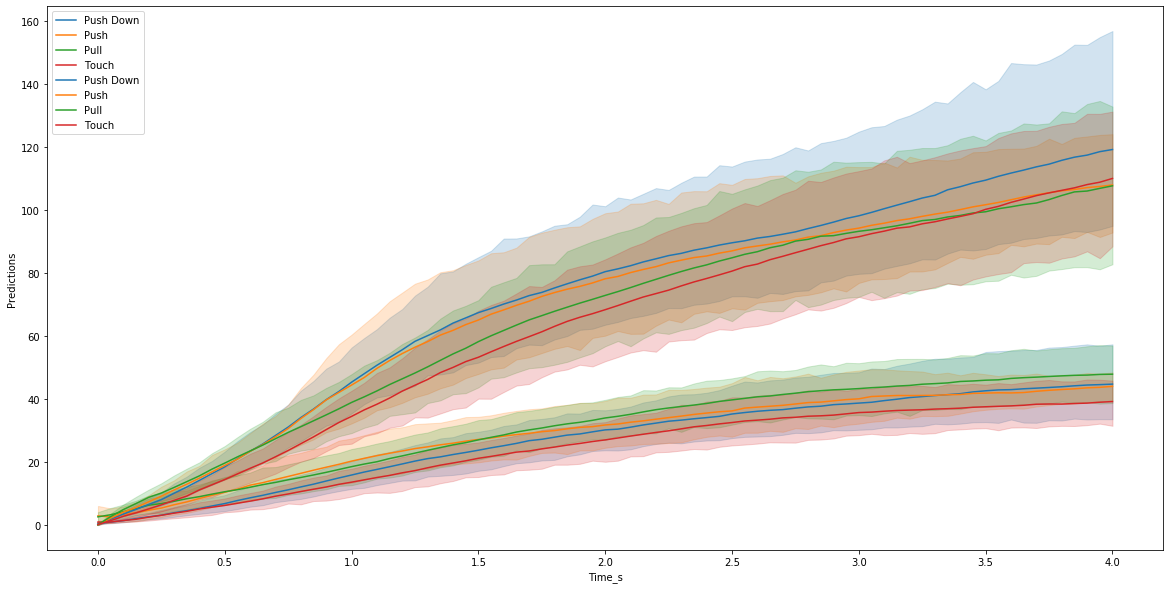

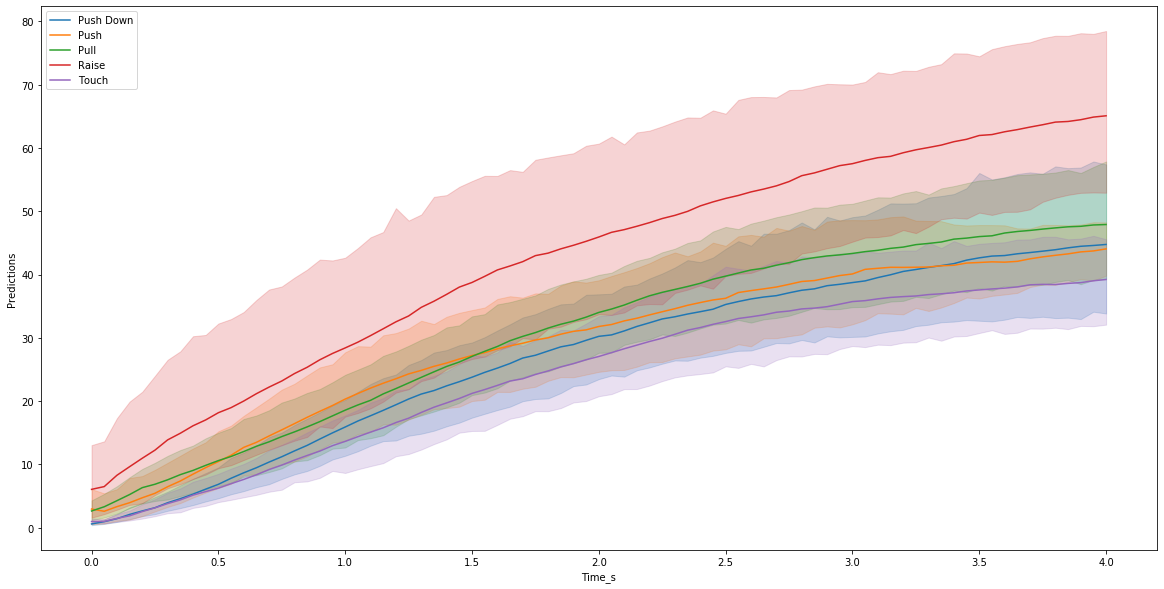

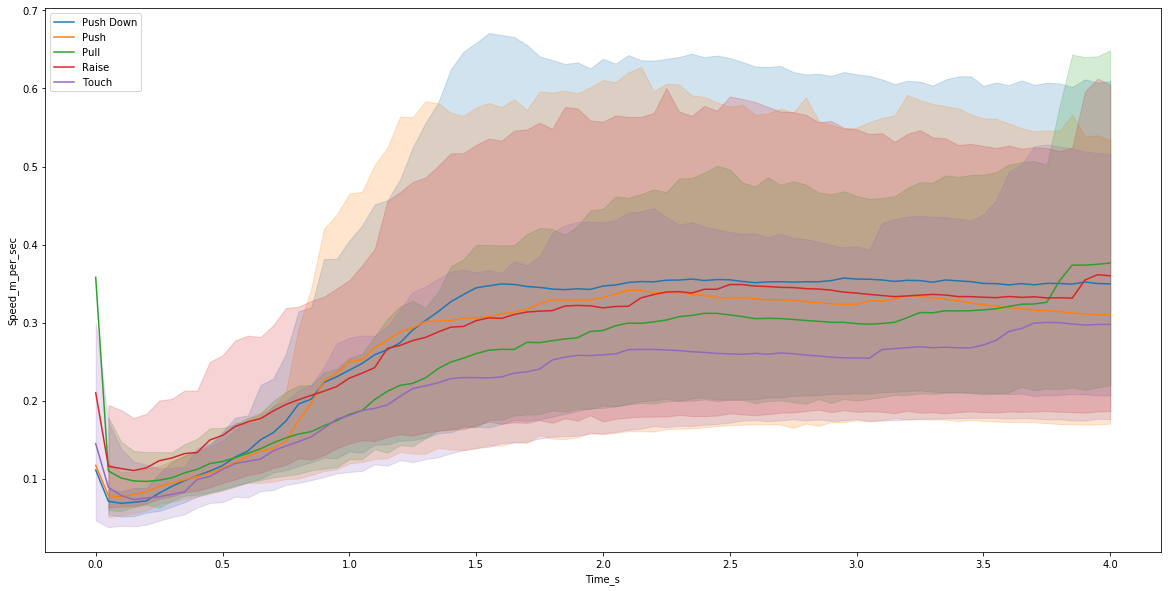

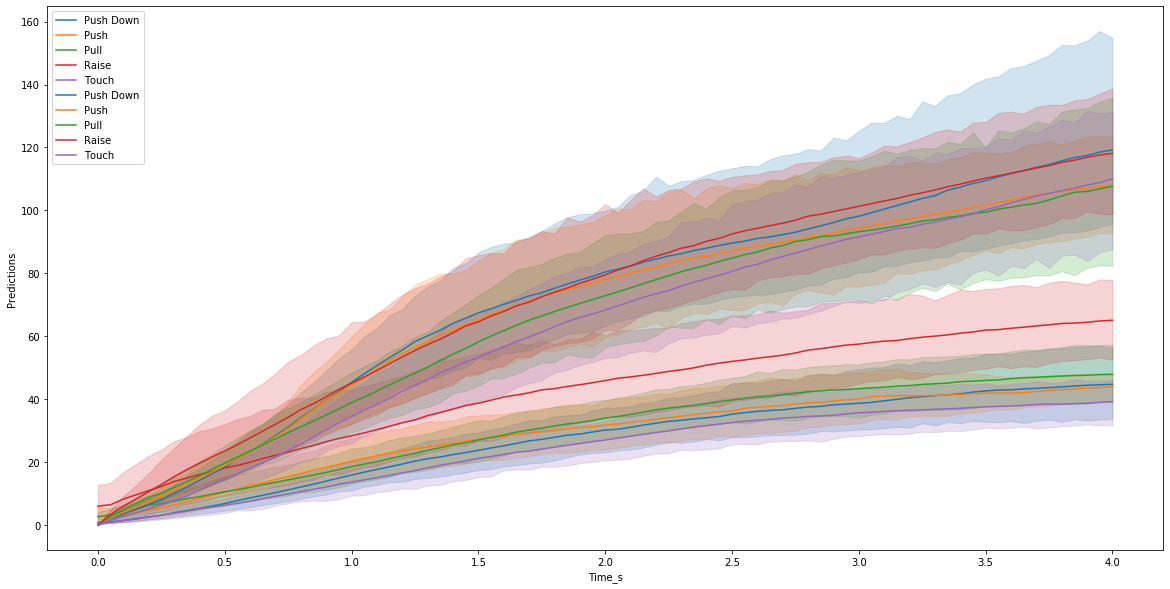

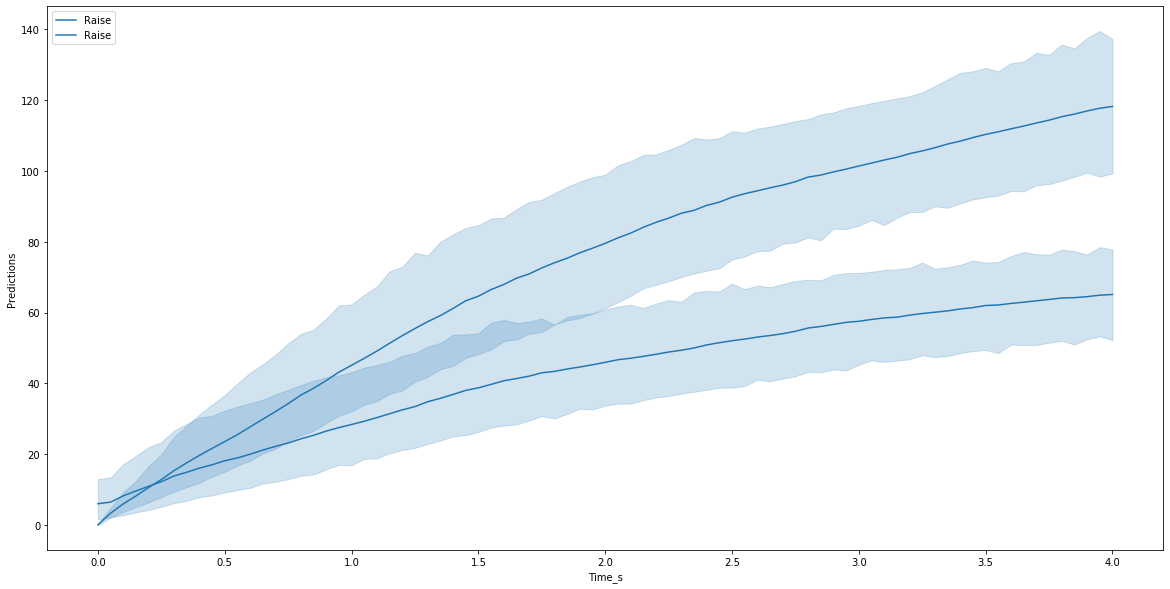

In [61]:

plt.figure(figsize = (20, 10))
cond = (meanTaskRTI['Task'] != 'Raise')
sns.lineplot(x = 'Time_s' , y = 'Predictions', hue = 'Task', data = meanTaskRTI[cond])
sns.lineplot(x = 'Time_s' , y = 'Positions', hue = 'Task', data = meanTaskRTI[cond])
plt.legend(loc='upper left')
plt.savefig('./Analysis/Figs_CleanData/Task-RTI_predPosNoRaise.pdf')

#sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Task', data = meanTaskRTI[cond])

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time_s' , y = 'Predictions', hue = 'Task', data = meanTaskRTI)
plt.legend(loc='upper left')
plt.savefig('./Analysis/Figs_CleanData/Task-RTI_predOnly.pdf')

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time_s' , y = 'Speed_m_per_sec', hue = 'Task', data = meanTaskRTI)
plt.legend(loc='upper left')
plt.savefig('./Analysis/Figs_CleanData/Task-RTI_speed.pdf')


plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time_s' , y = 'Predictions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time_s' , y = 'Positions', hue = 'Task', data = meanTaskRTI)
plt.legend(loc='upper left')
plt.savefig('./Analysis/Figs_CleanData/Task-RTI_predPosAll.pdf')

plt.figure(figsize = (20, 10))
cond2 = (meanTaskRTI['Task'] == 'Raise')
sns.lineplot(x = 'Time_s' , y = 'Predictions', hue = 'Task', data = meanTaskRTI[cond2])
sns.lineplot(x = 'Time_s' , y = 'Positions', hue = 'Task', data = meanTaskRTI[cond2])
plt.legend(loc='upper left')
plt.savefig('./Analysis/Figs_CleanData/Task-RTI_predPosRaise.pdf')

In [83]:
graspDuration['MeanDuration'].quantile(0.8)

4.201652051282036

In [84]:
0.75*4

3.0

In [88]:
meanRTI['Predictions'].quantile(0.95)

54.918231564901106

In [96]:
meanRTI['Predictions'].loc[1000].quantile(0.95)

31.799104444031066

In [100]:
meanRTI['Predictions'].loc[1500].quantile(0.95)

39.89787816575857

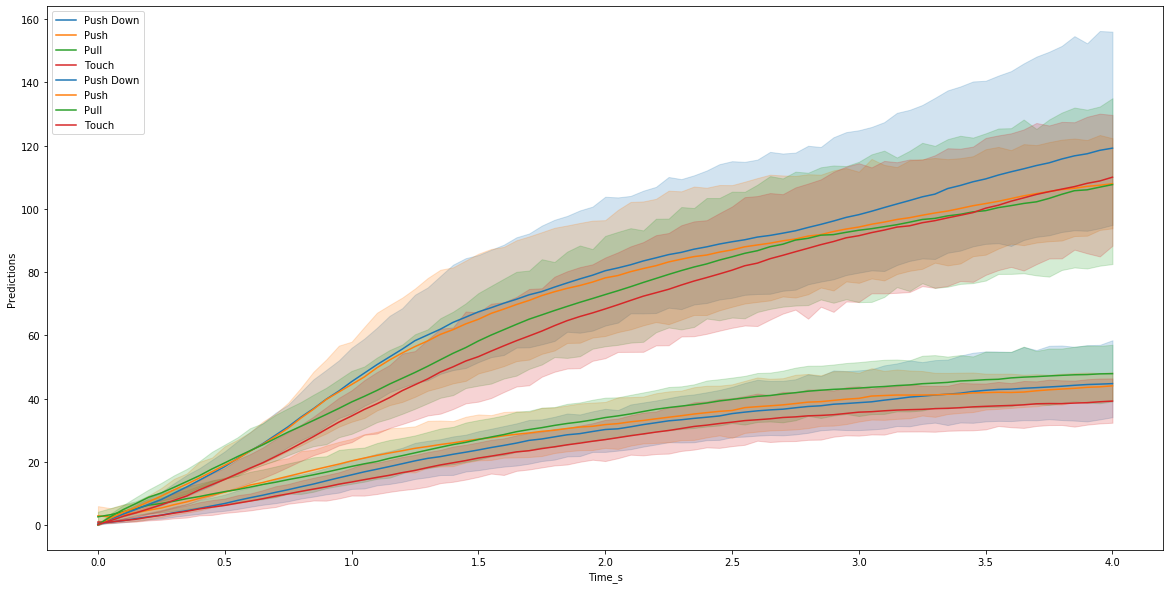

In [106]:
plt.figure(figsize = (20, 10))
cond2 = (meanTaskRTI['Task'] == 'Touch') | (meanTaskRTI['Task'] == 'Push')  | (meanTaskRTI['Task'] == 'Push Down')  | (meanTaskRTI['Task'] == 'Pull')
sns.lineplot(x = 'Time_s' , y = 'Predictions', hue = 'Task', data = meanTaskRTI[cond2])
sns.lineplot(x = 'Time_s' , y = 'Positions', hue = 'Task', data = meanTaskRTI[cond2])
plt.legend(loc='upper left')
#plt.savefig('./Analysis/Figs_CleanData/Task-RTI_predPosTouchPushDPull.pdf')

In [115]:
cond2 = (meanTaskRTI['Task'] == 'Raise')# | (meanTaskRTI['Task'] == 'Push')  | (meanTaskRTI['Task'] == 'Push Down')  | (meanTaskRTI['Task'] == 'Pull')
meanTaskRTI[cond2]['Predictions'].loc[1500].quantile(0.95)

69.74495968183359